# Notebook to generate time averaged spectr data file

This notebook generates time average and standard deviations from mean square data files. There are for types.
1. Volume mean square and average
    * [vol_ave_prefix].dat
    * [vol_pwr_prefix]_s.dat
    * [vol_pwr_prefix]_m0.dat
    * [typical scale prefix].dat
2. Volume power spectra
    * [vol_pwr_prefix]_l.dat
    * [vol_pwr_prefix]_m.dat
    * [vol_pwr_prefix]_lm.dat
3. Layerd mean and average
    * [layer pwr prefix]_s.dat
    * [layer pwr prefix]_m0.dat
4. Layerd power spectra
    * [layer pwr prefix]_l.dat
    * [layer pwr prefix]_m.dat
    * [layer pwr prefix]_lm.dat

In addition, small plotting routines for the time and volume averaged power spectrum is also included.

## Initial setup

In [1]:
import sys
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from ctypes import *

Move current directory to directory with data to be averaged

In [2]:
%cd ./

/Volumes/Sources/matsui/Kemorin_MHD/MHD/pythons


Check if shared libraly to load is there

In [3]:
%ls -l "libcalypso_to_pythons.so"

-rwxr-xr-x  1 matsui  staff  784453 Sep 19 10:58 libcalypso_to_pythons.so*


Load dynamic library to run the program

In [4]:
libname = "libcalypso_to_pythons.so"
flib = cdll.LoadLibrary(libname)

## Go to data directory

Move current directory to directory with data to be averaged

In [6]:
cd /Volumes/pub_q/matsui/sph_shell_394_3/monitor

/Volumes/pub_q/matsui/sph_shell_394_3/monitor


Check if data file to be averaged is there

In [7]:
ls -l

total 12716
-rw-------  1 matsui  staff   892087 Aug 24 18:31 Nusselt.dat.gz
-rw-------  1 matsui  staff   592198 Aug 24 18:31 dipolarity.dat.gz
-rw-rw-r--  1 matsui  staff  1224409 Aug 24 18:31 gauss_coefs_Re.dat.gz
-rw-------  1 matsui  staff  5180819 Aug 24 18:31 sph_ave_convective.dat.gz
-rw-------  1 matsui  staff  5125415 Aug 24 18:31 sph_ave_volume.dat.gz


## Time averaging for volume mean square and average

The folowing moniter data files can be treated in this block
1. Volume average data [vol_ave_prefix].dat
2. Volume mean square data [vol_pwr_prefix]_s.dat
3. Volume mean square data for axissymmetric component [vol_pwr_prefix]_m0.dat
4. Typical scale data [typical scale prefix].dat


Set file name to be averaged as [file_name], start time as [start_time], and end time as [end_time].

In [7]:
file_name = "sph_pwr_volume_s.dat"
start_time = 3.3
end_time =   4.3

file_nameStart time average program for volume spectrum data. Results are shown in the standard output, and the following files will be generated.
1. Time average data will be "t_ave_[file_name]",
2. Standard deviation will be "t_sigma_[file_name]".

In [8]:
flib.time_ave_sdev_sph_volume_pwr_f.restype = c_int
flib.time_ave_sdev_sph_volume_pwr_f.argtypes = [c_char_p, c_double, c_double]

n = flib.time_ave_sdev_sph_volume_pwr_f(file_name.encode(), c_double(start_time), c_double(end_time))

 Open file sph_pwr_volume_s.dat
 Number of components:           52
 K_ene_pol
 K_ene_tor
 K_ene
 temperature
 pressure
 vorticity_pol
 vorticity_tor
 vorticity
 M_ene_pol
 M_ene_tor
 M_ene
 current_density_pol
 current_density_tor
 current_density
 buoyancy_flux
 Lorentz_work
 vecp_induction_pol
 vecp_induction_tor
 vecp_induction
 rot_Lorentz_force_pol
 rot_Lorentz_force_tor
 rot_Lorentz_force
 rot_buoyancy_pol
 rot_buoyancy_tor
 rot_buoyancy
 rot_Coriolis_force_pol
 rot_Coriolis_force_tor
 rot_Coriolis_force
 Coriolis_force_pol
 Coriolis_force_tor
 Coriolis_force
 pressure_gradient_pol
 pressure_gradient_tor
 pressure_gradient
 buoyancy_pol
 buoyancy_tor
 buoyancy
 heat_flux_pol
 heat_flux_tor
 heat_flux
 inertia_pol
 inertia_tor
 inertia
 Lorentz_force_pol
 Lorentz_force_tor
 Lorentz_force
 viscous_diffusion_pol
 viscous_diffusion_tor
 viscous_diffusion
 rest_of_geostrophic_pol
 rest_of_geostrophic_tor
 rest_of_geostrophic

 Open file sph_pwr_volume_s.dat again

Start and end time:

## Time averaging for volume power spectra

The folowing moniter data files can be treated in this block
1. Volume power specta data 
    * [vol_pwr_prefix]_l.dat
    * [vol_pwr_prefix]_m.dat
    * [vol_pwr_prefix]_lm.dat

Set file name to be averaged as [file_name], start time as [start_time], and end time as [end_time].

In [10]:
file_name = "sph_pwr_volume_l.dat"
start_time = 5.25
end_time =   6.25

Start time average program for volume spectrum data. The following files will be generated.
1. Time average data will be "t_ave_[file_name]",
2. Standard deviation will be "t_sigma_[file_name]".

In [ ]:
flib.time_ave_sdev_sph_vol_spectr_f.restype = c_int
flib.time_ave_sdev_sph_vol_spectr_f.argtypes = [c_char_p, c_double, c_double]

n = flib.time_ave_sdev_sph_vol_spectr_f(file_name.encode(), c_double(start_time), c_double(end_time))

## Time averaging for layerd mean square and average

The folowing moniter data files can be treated in this block
1. Layerd mean square data [layer pwr prefix]_s.dat
2. Layerd mean square data for axissymmetric component [layer pwr prefix]_m0.dat

Set file name to be averaged as [file_name], start time as [start_time], and end time as [end_time].

In [12]:
file_name = "sph_pwr_layer_s.dat"
start_time = 5.0
end_time =  12.0

Start time average program for volume spectrum data. The following files will be generated.
1. Time average data will be "t_ave_[file_name]",
2. Standard deviation will be "t_sigma_[file_name]".

In [13]:
flib.time_ave_sdev_sph_layer_pwr_f.restype = c_int
flib.time_ave_sdev_sph_layer_pwr_f.argtypes = [c_char_p, c_double, c_double]

n = flib.time_ave_sdev_sph_layer_pwr_f(file_name.encode(), c_double(start_time), c_double(end_time))

 Open file sph_pwr_layer_s.dat
 Number of components:           16
 K_ene_pol
 K_ene_tor
 K_ene
 temperature
 pressure
 vorticity_pol
 vorticity_tor
 vorticity
 M_ene_pol
 M_ene_tor
 M_ene
 current_density_pol
 current_density_tor
 current_density
 buoyancy_flux
 Lorentz_work

 Open file sph_pwr_layer_s.dat again

Start and end time:        5.001999999979800E+000   1.200199999971480E+001


## Time averaging for layerd power spectra


The folowing moniter data files can be treated in this block
1. Layerd power specta data [layer pwr prefix]_l.dat, [layer pwr prefix]_l.dat, [layer pwr prefix]_lm.dat


Set file name to be averaged as [file_name], start time as [start_time], and end time as [end_time].

In [9]:
file_name = "sph_pwr_layer_lm.dat"
start_time = 1.6
end_time =   2.0

Start time average program for volume spectrum data. The following files will be generated.
1. Time average data will be "t_ave_[file_name]",
2. Standard deviation will be "t_sdev_[file_name]".

In [10]:
flib.time_ave_sdev_sph_layer_spec_f.restype = c_int
flib.time_ave_sdev_sph_layer_spec_f.argtypes = [c_char_p, c_double, c_double]

n = flib.time_ave_sdev_sph_layer_spec_f(file_name.encode(), c_double(start_time), c_double(end_time))

AttributeError: dlsym(0x12ee06fd0, time_ave_sdev_sph_layer_spec_f): symbol not found

## Check time average data (Optional)
These are very simple output to look at the time average and standard deviation data output. Please be careful to display large size data.

In [20]:
average_file = "t_ave_" + file_name
f = open(average_file, 'r', encoding='UTF-8')
data = f.read()
print(data)
f.close()

radial_layers, truncation
               1               0
ICB_id, CMB_id
               1              96
Lower boundary
               1  3.33333333333333E-001
Upper boundary
              96  1.33333333333333E+000
number of components
               8              16
    3    1    1    3    3    3    1    1
t_step    time    K_ene_pol    K_ene_tor    K_ene    temperature    pressure    vorticity_pol    vorticity_tor    vorticity    M_ene_pol    M_ene_tor    M_ene    current_density_pol    current_density_tor    current_density    buoyancy_flux    Lorentz_work    
         1200200   1.200199999971480E+001   1.124968193985901E+002   3.256953131006878E+002   4.381921324992790E+002   3.900325179737186E-002   1.011183309530280E+002   6.545558538309260E+004   4.164720488770660E+004   1.071027902707994E+005   7.951497765874202E-004   1.606955282000407E-003   2.402105058587819E-003   7.892225568491102E-001   3.992135597819310E-001   1.188436116631040E+000   4.255784648182228E+011   2.214927

Check standard deviation data (Optional)

In [22]:
average_file = "t_sigma_" + file_name
f = open(average_file, 'r', encoding='UTF-8')
data = f.read()
print(data)
f.close()

radial_layers, truncation
               1               0
ICB_id, CMB_id
               1              96
Lower boundary
               1  3.33333333333333E-001
Upper boundary
              96  1.33333333333333E+000
number of components
               8              16
    3    1    1    3    3    3    1    1
t_step    time    K_ene_pol    K_ene_tor    K_ene    temperature    pressure    vorticity_pol    vorticity_tor    vorticity    M_ene_pol    M_ene_tor    M_ene    current_density_pol    current_density_tor    current_density    buoyancy_flux    Lorentz_work    
         1200200   1.200199999971480E+001   1.724354485456676E+001   6.533648321495633E+001   7.940593759074467E+001   1.498824868699157E-003   3.347082592375858E+001   9.747288735158802E+003   6.427796099583609E+003   1.566466455805707E+004   4.771690663630584E-004   1.052977909815143E-003   1.498330406709799E-003   5.308683477573717E-001   2.559441264788652E-001   7.695991313525288E-001   9.185982430346094E+010   4.891228

## Simple XY plot for thime averaged volume spectrum
Here is a very simple program to make a time averaged power spectrum plot frem obtained results. There are a lot of room to improve the image quality.

In [7]:
file_name = "sph_pwr_volume_lm.dat"
tave_file_name = "t_ave_" +   file_name
sdev_file_name = "t_sigma_" + file_name

flib.read_tave_sdev_sph_vol_spec_f.restype = c_int
flib.read_tave_sdev_sph_vol_spec_f.argtypes = [c_char_p, c_char_p]
truncation = flib.read_tave_sdev_sph_vol_spec_f(tave_file_name.encode(), sdev_file_name.encode())

print("Truncation level:", truncation)


 Open file t_ave_sph_pwr_volume_lm.dat again
 Number of components:           16
 K_ene_pol
 K_ene_tor
 K_ene
 temperature
 pressure
 vorticity_pol
 vorticity_tor
 vorticity
 M_ene_pol
 M_ene_tor
 M_ene
 current_density_pol
 current_density_tor
 current_density
 buoyancy_flux
 Lorentz_work
 Open file t_sigma_sph_pwr_volume_lm.dat again
 Number of components:           16
 K_ene_pol
 K_ene_tor
 K_ene
 temperature
 pressure
 vorticity_pol
 vorticity_tor
 vorticity
 M_ene_pol
 M_ene_tor
 M_ene
 current_density_pol
 current_density_tor
 current_density
 buoyancy_flux
 Lorentz_work
Truncation level: 95


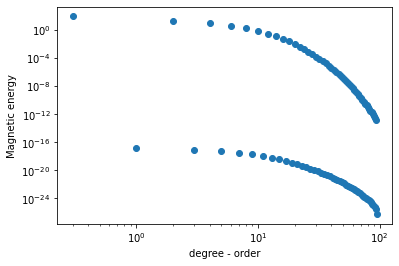

In [8]:
# Set truncation for plot
ltr = truncation
# Set component name to be plotted
field_name = "K_ene_pol"

# Initialize arrays
lx =         np.zeros((ltr+1))
ave_spec =   np.zeros((ltr+1))
sdev_spec =  np.zeros((ltr+1))

# Load time average and standard deviation
flib.load_field_labels_f.restype = c_void_p
flib.load_field_labels_f.argtypes = [c_int, c_char_p, np.ctypeslib.ndpointer(dtype=np.float64),
                                     np.ctypeslib.ndpointer(dtype=np.float64)]

flib.load_field_labels_f(c_int(ltr), field_name.encode(), ave_spec, sdev_spec)

# Set modes for horiziontal axis
for i in range(ltr+1):
  lx[i] = i
#  Plot degree 0 at x = 0.3 in log scale
lx[0] = 0.3

#  Start plotting
# plt.plot(lx,ave_spec)
plt.scatter(lx,ave_spec)
# plt.errorbar(lx, ave_spec, yerr=sdev_spec, lolims=True,)

plt.xlabel('degree - order')
plt.ylabel('Magnetic energy')

plt.xscale('log')
plt.yscale('log')

plt.show()